# Homework

In [867]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from scipy.cluster.hierarchy import linkage,dendrogram

numpy version :  1.20.1
pandas version :  1.1.3
seaborn version :  0.11.0


In [868]:
df = pd.read_csv('flight.csv')
df.tail(2)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
62986,61027,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,0.0,3934,2/26/2013,400,12.0,12,0,0.0,0,0
62987,61340,2/17/2013,2/17/2013,Female,4,shanghai,.,CN,29.0,3/31/2014,...,0.0,4222,2/23/2013,403,6.0,6,0,0.0,0,0


In [869]:
df.FFP_TIER[df.FFP_TIER > 4]

0        6
1        6
2        6
3        5
4        6
        ..
62035    6
62162    5
62255    6
62506    5
62632    5
Name: FFP_TIER, Length: 4922, dtype: int64

# Simple Exploratory Data Analysis
Bagian ini akan sedikit membahas mengenai kondisi data secara keseluruhan. Karena bukan fokus pada modul unsupervised Learning, Bagian ini tidak akan digali insight lebih banyak

## General Info

In [870]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Deskripsi menggunakan fungsi `info()` untuk mengetahui kondisi dari dataset (tipe data, adanya nilai null, hingga jumlah baris)
- Terdapat 62,988 rows
- terdapat 6 kolom yang mempunyai nilai NULL, sehingga tidak diperlukan drop null values

## Variabel Numerik

In [871]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


## Univariate Analysis

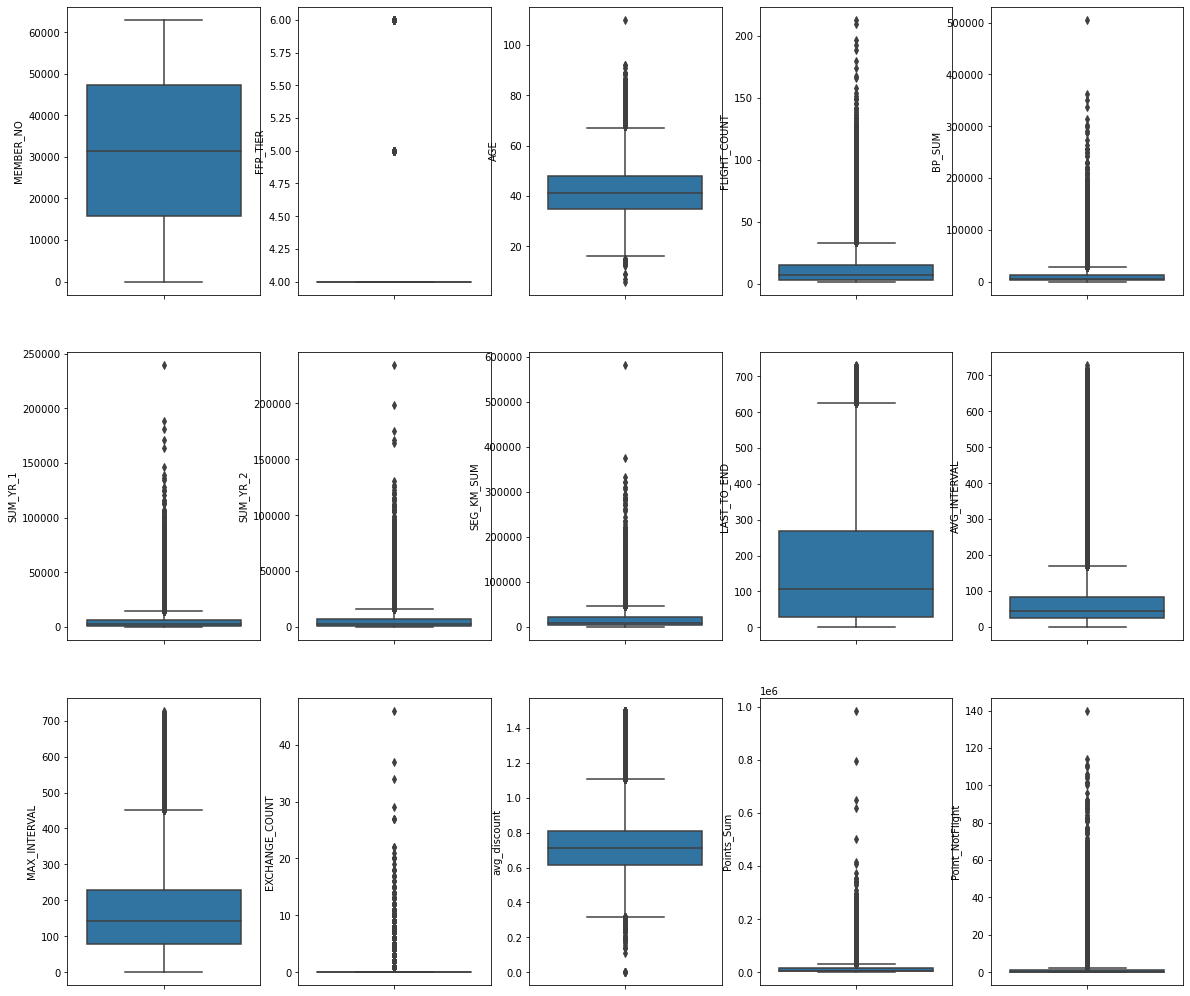

In [872]:
#using boxplot
features = df.select_dtypes(["float64", "int64", "boolean"]).columns

fig, ax = plt.subplots(3, 5, figsize=(20, 18))
rows    = [0]*5 + [1]*5 + [2]*5
cols    = [0, 1, 2, 3, 4] * 3
for row, col, feature in zip(rows, cols, features):
    sns.boxplot(y=feature, data=df[features], ax=ax[row, col])
    
plt.savefig("boxplot")

Banyak outlier yang ada pada feature. Maka kita akan melakukan proses penghapusan outlier

## Multivariate Analysis

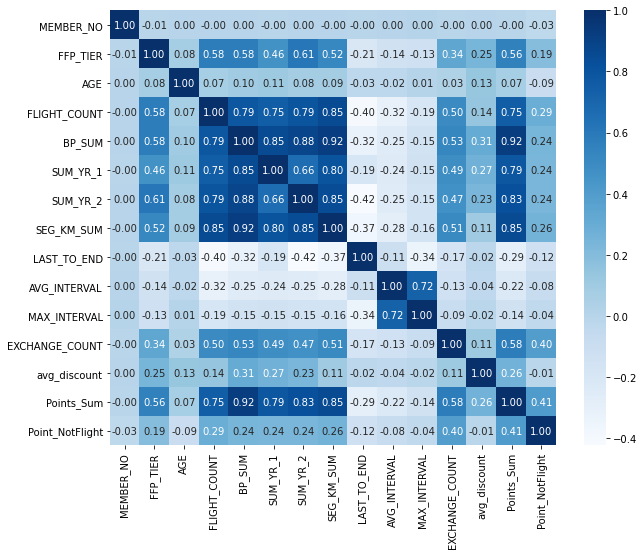

In [873]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.savefig("heatmap")

disini kita dapat melihat data yang memiliki korelasi diatas 0.8 antar feature
- Point_Sum dan BP_Sum
- Point_Sum dan Sum_Yr_2
- Point_Sum dan Sum_Yr_1
- Seg_Km_sum dan Flight_Count
- Seg_Km_sum dan Sum_Yr_1
- Seg_Km_sum dan Sum_Yr_2
- Seg_Km_sum dan Point_sum
- Seg_Km_sum dan BP_sum
- Bp_sum dan Sum_yr2
- Flight_count dan Sum_yr2
- Flight_count dan Sum_yr1
- Flight_count dan BP_Sum
- Flight_count dan Point_SUm

dan juga terdapat feature yang tidak memiliki korelasi dengan feature lain
- Member no
- Age
- last_to_end
- avg_interval
- max interval
- avg_discount

# Preprocessing

## Missing Values

In [874]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [875]:
df.shape

(62988, 23)

Terdapat 7000 rows missing value pada description, jumlahnya masih tidak terlalu besar dengan total data yang ada. jadi dapat langsung di hapus saja

In [876]:
df = df.dropna()

In [877]:
print(df.shape)

(58255, 23)


## Duplicate Values

In [878]:
df.duplicated().sum()

0

In [879]:
df = df.drop_duplicates()
print(df.shape)

(58255, 23)


## Outliers
- Untuk linear regression, penting untuk dilakukan outliers removal untuk menghindari noise pada data yang mempengaruhi hasil garis linear.

In [880]:
features = df.select_dtypes(["float64", "int64", "boolean"]).columns

for f in features:
    Q1 = df[f].quantile(0.25)
    Q3 = df[f].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5 * IQR)
    high_limit = Q3 + (1.5 * IQR)
    filtered_entries = ((df[f] >= low_limit) & (df[f] <= high_limit))
    df = df[filtered_entries]
print(df.shape)

(28470, 23)


In [881]:
df.FFP_TIER[df.FFP_TIER > 4]

Series([], Name: FFP_TIER, dtype: int64)

# Feature Engineering

In [882]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28470 entries, 11525 to 62978
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          28470 non-null  int64  
 1   FFP_DATE           28470 non-null  object 
 2   FIRST_FLIGHT_DATE  28470 non-null  object 
 3   GENDER             28470 non-null  object 
 4   FFP_TIER           28470 non-null  int64  
 5   WORK_CITY          28470 non-null  object 
 6   WORK_PROVINCE      28470 non-null  object 
 7   WORK_COUNTRY       28470 non-null  object 
 8   AGE                28470 non-null  float64
 9   LOAD_TIME          28470 non-null  object 
 10  FLIGHT_COUNT       28470 non-null  int64  
 11  BP_SUM             28470 non-null  int64  
 12  SUM_YR_1           28470 non-null  float64
 13  SUM_YR_2           28470 non-null  float64
 14  SEG_KM_SUM         28470 non-null  int64  
 15  LAST_FLIGHT_DATE   28470 non-null  object 
 16  LAST_TO_END       

### Menambah feature Baru

In [883]:
#membuat data sudah berapa lama customer menjadi member
df.FFP_DATE = pd.to_datetime(df.FFP_DATE)
df.FFP_DATE = df.FFP_DATE.dt.month + (df.FFP_DATE.dt.year * 12)
df.FFP_DATE

11525    24062
11587    24152
11738    24155
11886    24059
12003    24140
         ...  
62962    24139
62963    24060
62964    24157
62965    24108
62978    24136
Name: FFP_DATE, Length: 28470, dtype: int64

In [884]:
df.LAST_FLIGHT_DATE[df.LAST_FLIGHT_DATE == "2/29/2014"]

Series([], Name: LAST_FLIGHT_DATE, dtype: object)

In [885]:
#membuat data tanggal terakhir customer terbang
df.LAST_FLIGHT_DATE = pd.to_datetime(df.LAST_FLIGHT_DATE, format='%m/%d/%Y', errors='coerce')
df.LAST_FLIGHT_DATE = df.LAST_FLIGHT_DATE.dt.month + (df.LAST_FLIGHT_DATE.dt.year * 12)
df.LAST_FLIGHT_DATE

11525    24170.0
11587    24171.0
11738    24171.0
11886    24170.0
12003    24169.0
          ...   
62962    24155.0
62963    24163.0
62964    24158.0
62965    24158.0
62978    24162.0
Name: LAST_FLIGHT_DATE, Length: 28470, dtype: float64

In [886]:
df["lama_menjadi_member"] = df.LAST_FLIGHT_DATE - df.FFP_DATE
df["lama_menjadi_member"]

11525    108.0
11587     19.0
11738     16.0
11886    111.0
12003     29.0
         ...  
62962     16.0
62963    103.0
62964      1.0
62965     50.0
62978     26.0
Name: lama_menjadi_member, Length: 28470, dtype: float64

In [887]:
df["lama_menjadi_member"].describe()

count    28316.000000
mean        36.160581
std         27.680305
min          0.000000
25%         13.000000
50%         28.000000
75%         58.000000
max        112.000000
Name: lama_menjadi_member, dtype: float64

In [888]:
df = df.dropna()
df.shape

(28316, 24)

dengan data ini kita dapat melihat sudah berapa lama user menjadi member tetapi tetap menggunakan airways kita

### Gender

In [889]:
#mengubah gender menggunakan encoding
encoding = pd.get_dummies(df["GENDER"])
df = df.join(encoding)

In [890]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28316 entries, 11525 to 62978
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MEMBER_NO            28316 non-null  int64  
 1   FFP_DATE             28316 non-null  int64  
 2   FIRST_FLIGHT_DATE    28316 non-null  object 
 3   GENDER               28316 non-null  object 
 4   FFP_TIER             28316 non-null  int64  
 5   WORK_CITY            28316 non-null  object 
 6   WORK_PROVINCE        28316 non-null  object 
 7   WORK_COUNTRY         28316 non-null  object 
 8   AGE                  28316 non-null  float64
 9   LOAD_TIME            28316 non-null  object 
 10  FLIGHT_COUNT         28316 non-null  int64  
 11  BP_SUM               28316 non-null  int64  
 12  SUM_YR_1             28316 non-null  float64
 13  SUM_YR_2             28316 non-null  float64
 14  SEG_KM_SUM           28316 non-null  int64  
 15  LAST_FLIGHT_DATE     28316 non-n

### Biaya perjalanan per kilometer

In [891]:
df["biaya_per_km"] = (df.SUM_YR_1 + df.SUM_YR_2) / df.SEG_KM_SUM
df["biaya_per_km"]

11525    0.685344
11587    0.634483
11738    0.706760
11886    0.651785
12003    0.704866
           ...   
62962    2.277174
62963    2.717391
62964    2.255435
62965    2.255435
62978    0.486842
Name: biaya_per_km, Length: 28316, dtype: float64

disini dapat dilihat untuk value setiap customer nya berdasarkan biaya yang di keluarkan customer ke perusahaan

# Feature Selection

Berdasarkan proses EDA serta fitur engineering, kita akan memilih feature berikut untuk di masukan ke dalam modelling :
- FFP_TIER
- FLIGHT_COUNT
- AVG_INTERVAL
- EXCHANGE_COUNT
- avg_discount
- lama_menjadi_member
- biaya_per_km
- Points_Sum
- Point_NotFlight

In [892]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28316 entries, 11525 to 62978
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MEMBER_NO            28316 non-null  int64  
 1   FFP_DATE             28316 non-null  int64  
 2   FIRST_FLIGHT_DATE    28316 non-null  object 
 3   GENDER               28316 non-null  object 
 4   FFP_TIER             28316 non-null  int64  
 5   WORK_CITY            28316 non-null  object 
 6   WORK_PROVINCE        28316 non-null  object 
 7   WORK_COUNTRY         28316 non-null  object 
 8   AGE                  28316 non-null  float64
 9   LOAD_TIME            28316 non-null  object 
 10  FLIGHT_COUNT         28316 non-null  int64  
 11  BP_SUM               28316 non-null  int64  
 12  SUM_YR_1             28316 non-null  float64
 13  SUM_YR_2             28316 non-null  float64
 14  SEG_KM_SUM           28316 non-null  int64  
 15  LAST_FLIGHT_DATE     28316 non-n

In [893]:
df_new = df.drop(["MEMBER_NO","FFP_DATE","FIRST_FLIGHT_DATE","GENDER", "WORK_CITY","WORK_PROVINCE","WORK_COUNTRY",
                  "AGE","LOAD_TIME","BP_SUM","SUM_YR_1", "SUM_YR_2", "SEG_KM_SUM", "LAST_FLIGHT_DATE", "LAST_TO_END",
                  "MAX_INTERVAL", "Female", "Male"] , axis=1)
print(df_new.shape)

(28316, 9)


In [894]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28316 entries, 11525 to 62978
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FFP_TIER             28316 non-null  int64  
 1   FLIGHT_COUNT         28316 non-null  int64  
 2   AVG_INTERVAL         28316 non-null  float64
 3   EXCHANGE_COUNT       28316 non-null  int64  
 4   avg_discount         28316 non-null  float64
 5   Points_Sum           28316 non-null  int64  
 6   Point_NotFlight      28316 non-null  int64  
 7   lama_menjadi_member  28316 non-null  float64
 8   biaya_per_km         28316 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 3.4 MB


## Standarisasi Feature

Diperlukan standarisasi data agar proses modelling lebih mudah di lakukan dikarenakan jarak data tidak jauh

In [895]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(df_new.astype(float))

new_df = pd.DataFrame(data = data_std)
new_df.describe()


,0,1,2,3,4,5,6,7,8
count,28316.0,2.831600e+04,2.831600e+04,28316.0,2.831600e+04,2.831600e+04,28316.0,2.831600e+04,2.831600e+04
mean,0.0,3.503517e-14,-2.616560e-15,0.0,1.696560e-15,-4.172597e-15,0.0,-1.679571e-15,5.600361e-16
std,0.0,1.000018e+00,1.000018e+00,0.0,1.000018e+00,1.000018e+00,0.0,1.000018e+00,1.000018e+00
min,0.0,-9.932576e-01,-1.380997e+00,0.0,-2.758753e+00,-1.403644e+00,0.0,-1.306388e+00,-2.349513e+00
25%,0.0,-7.613804e-01,-7.147662e-01,0.0,-6.677295e-01,-7.997097e-01,0.0,-8.367317e-01,-5.746849e-01
50%,0.0,-2.976260e-01,-1.787763e-01,0.0,3.585962e-02,-2.527839e-01,0.0,-2.948206e-01,-5.428371e-02
75%,0.0,3.980056e-01,5.466276e-01,0.0,6.965471e-01,5.872015e-01,0.0,7.890016e-01,4.665666e-01
max,0.0,5.035550e+00,3.051789e+00,0.0,2.788282e+00,3.271948e+00,0.0,2.739882e+00,1.460391e+01


In [896]:
print(df.shape)

(28316, 27)


# Modeling

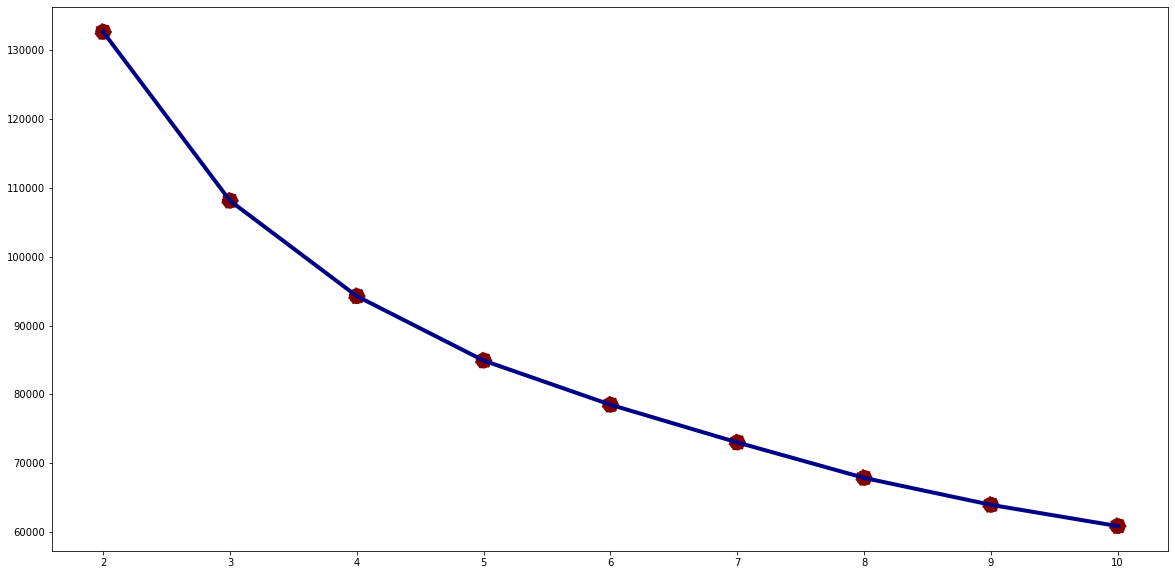

In [897]:
#menentukan jumlah clustering
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(new_df)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

plt.savefig("inertia")

In [898]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


untuk jumlah clustering yang akan digunakan dalam proses modelling, kita akan menggunakan 3 Cluster

In [899]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(new_df)
    preds = kmeans.predict(new_df)
     
    score_euclidean = silhouette_score(new_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

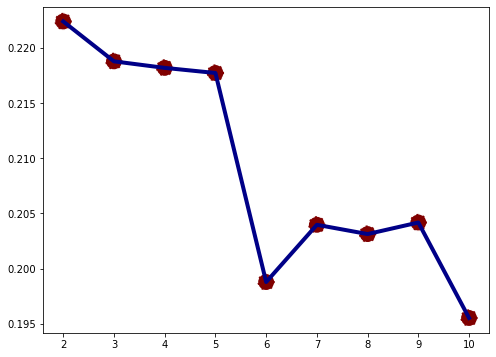

In [900]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

plt.savefig("silhoutte")

Dari proses pengecekan menggunakan silhouette score maka kita bisa memastikan jumlah cluster yang baik digunakan adalah 3 cluster

In [901]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(new_df)

In [902]:
df_data_std = pd.DataFrame(data=new_df, columns=list(df))

In [903]:
df_data_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28316 entries, 0 to 28315
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MEMBER_NO            0 non-null      float64
 1   FFP_DATE             0 non-null      float64
 2   FIRST_FLIGHT_DATE    0 non-null      float64
 3   GENDER               0 non-null      float64
 4   FFP_TIER             0 non-null      float64
 5   WORK_CITY            0 non-null      float64
 6   WORK_PROVINCE        0 non-null      float64
 7   WORK_COUNTRY         0 non-null      float64
 8   AGE                  0 non-null      float64
 9   LOAD_TIME            0 non-null      float64
 10  FLIGHT_COUNT         0 non-null      float64
 11  BP_SUM               0 non-null      float64
 12  SUM_YR_1             0 non-null      float64
 13  SUM_YR_2             0 non-null      float64
 14  SEG_KM_SUM           0 non-null      float64
 15  LAST_FLIGHT_DATE     0 non-null     

In [904]:
df_data_std['clusters'] = kmeans.labels_
df_new['clusters'] = kmeans.labels_

In [905]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28316 entries, 11525 to 62978
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FFP_TIER             28316 non-null  int64  
 1   FLIGHT_COUNT         28316 non-null  int64  
 2   AVG_INTERVAL         28316 non-null  float64
 3   EXCHANGE_COUNT       28316 non-null  int64  
 4   avg_discount         28316 non-null  float64
 5   Points_Sum           28316 non-null  int64  
 6   Point_NotFlight      28316 non-null  int64  
 7   lama_menjadi_member  28316 non-null  float64
 8   biaya_per_km         28316 non-null  float64
 9   clusters             28316 non-null  int32  
dtypes: float64(4), int32(1), int64(5)
memory usage: 3.5 MB


In [906]:
df_new = df_new.reset_index()
df_new.drop(["index"], axis=1)

,FFP_TIER,FLIGHT_COUNT,AVG_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,lama_menjadi_member,biaya_per_km,clusters
0,4,15,48.357143,0,0.755441,15400,0,108.0,0.685344,1
1,4,10,60.444444,0,0.795668,15716,0,19.0,0.634483,1
2,4,13,34.833333,0,0.775179,15079,0,16.0,0.706760,1
3,4,15,46.142857,0,0.748045,14920,0,111.0,0.651785,1
4,4,13,51.583333,0,0.848179,13765,0,29.0,0.704866,1
...,...,...,...,...,...,...,...,...,...,...
28311,4,2,168.000000,0,0.750000,400,0,16.0,2.277174,0
28312,4,2,4.000000,0,0.750000,400,0,103.0,2.717391,0
28313,4,2,10.000000,0,0.750000,400,0,1.0,2.255435,0
28314,4,2,24.000000,0,0.750000,400,0,50.0,2.255435,0


# Insight

In [907]:
#use PCA karena feature sangat banyak
pca = PCA(n_components=2)

pca.fit(new_df)
pcs = pca.transform(new_df)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca.info()
print(data_pca.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28316 entries, 0 to 28315
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC 1    28316 non-null  float64
 1   PC 2    28316 non-null  float64
dtypes: float64(2)
memory usage: 442.6 KB
(28316, 2)


In [908]:
data_pca["Cluster"] = df_new["clusters"]
data_pca.info()
print(data_pca.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28316 entries, 0 to 28315
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PC 1     28316 non-null  float64
 1   PC 2     28316 non-null  float64
 2   Cluster  28316 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 553.2 KB
(28316, 3)


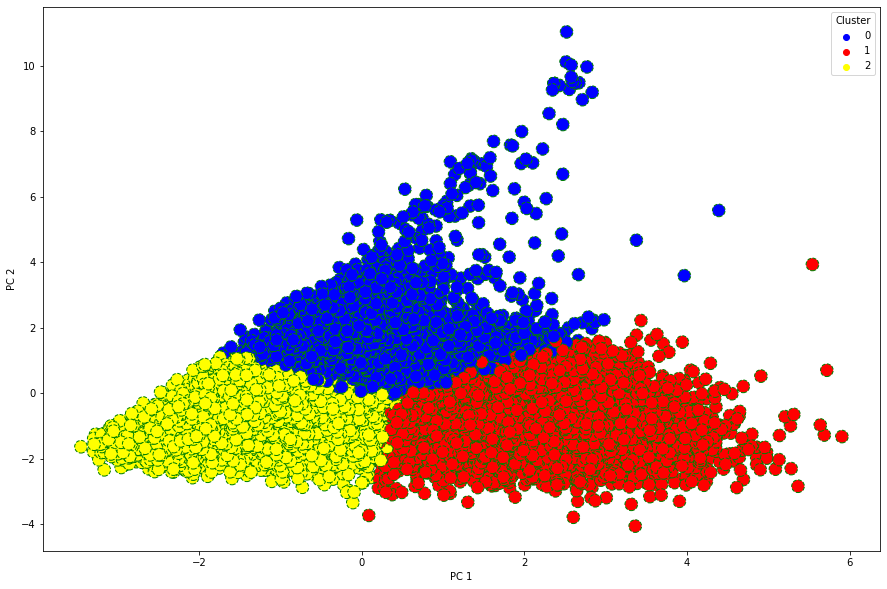

In [909]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="Cluster",
    edgecolor='green',
    linestyle='--',
    data=data_pca,
    palette=['blue','red',"yellow"],
    s=160,
    ax=ax
)

plt.savefig("hasil clustering")

In [910]:
display(df_new.groupby('clusters').agg(['mean','median']))

index        FFP_TIER        FLIGHT_COUNT         \
                  mean median     mean median         mean median   
clusters                                                            
0         44210.376794  43882        4      4     4.165662      4   
1         23161.179943  22919        4      4    11.842432     11   
2         45386.167715  45760        4      4     4.421920      4   

         AVG_INTERVAL            EXCHANGE_COUNT        avg_discount            \
                 mean     median           mean median         mean    median   
clusters                                                                        
0           64.485056  58.500000              0      0     0.826958  0.815018   
1           48.979304  46.733333              0      0     0.718493  0.715682   
2           66.773517  62.000000              0      0     0.566202  0.577457   

           Points_Sum        Point_NotFlight        lama_menjadi_member  \
                 mean median            mean median                mean   
clusters                                                                  
0         3714.783828   3446               0      0           32.311055   
1         9121.016849   8820               0      0           44.582289   
2         2743.085981   2409               0      0           33.837213   

                biaya_per_km            
         median         mean    median  
clusters                                
0          24.0     0.827252  0.775156  
1          38.0     0.608598  0.617054  
2          25.0     0.455108  0.472298

In [ ]:
savefig